
## Barro Lee project - To outline correlations between different levels of educational attainment & success indicators of a society.

The purpose of education has been a widely contested issue between the mainstream segment of the society and the sidelined yet vocal resistance to the centralized education system. The dissidents claim that it serves to create cogs to continue the machine of aristocratic rule of the hegemony; to create more soldiers, clerks, factory workers, etc. that can perform the tasks of social maintainence obediently and at the cost of keeping their potentials unrealized. To support their claims, they point towards the american pioneer who brought in the idea of mandatory schooling to USA Horace Mann based off of the Prussian Model of Education and then the standardization of education curriculum by the committee of 1892 to uniformly create individuals capable of undergoing technical education in order to create what has been mentioned above; cogs.

The mainstream opposition's rebuttals are many, among which are access to free, public education being a basic human right, education allowing for an increase in the living standards of people by giving them the abilities to work for higher wages, etc. The contention between the two sides can be summarized by the following: Education is used as a factory to produce building blocks for the society so that the aristocracy can be maintained Vs education is used to build up the society so the *individuals* of that society can elevate their standards of living.

As one might guess, it is quite a conundrum for anyone to land a conclusion with either side given the half-a-dozen nuances that are present in such a discussion. Thereby the purpose of this article is to analze premises that might guide our formulation of positions on this complex topic through correlations in the level of education attained among populations and different indicators for the success of society as well as the contentment of the individuals.

### <u>Technical Synopsis:</u>
Below is a collection of different tools and techniques used through out the project.
#### Tech Stack:
Microsoft Excel for Data wrangling, Pandas for Data wrangling and Analysis, Matplotlib for presentation.
#### - Data-Wrangling Techniques:
Broadcasting, groupingby, left-joining on multiple indices.
#### -  Descriptive Analysis:
Correlation Coefficient, Scatterplot, Coefficient of determination.


## Explanation of the data:

### Barro Lee Dataset.
Barro Lee dataset, as collected by Robert J. Barro of Harvard University and Jong Wha Lee of the Korea University as published with an explanation in the article titled "A New Data Set of the Educational Attainment in the World, 1950-2010" in the <i>Journal of Development Economics</i>. 

#### Metadata:
It is to outline the educational attainment of about 146 countries under 7 categories. Those categories are designated below along with the abbreviations used for each of them:

- no formal education - hu
- incomplete primary - hpi
- complete primary - hpc
- lower secondary - hsi
- upper secondary - hsc
- incomplete tertiary - hhi
- complete tertiary education - hhc

The data is disaggregated by gender and by 5 year age intervals. The data is adjusted for mortality rates, especially for the age group of over 65 years old where a different in education level is showing a significant difference in the mortality rate, with a higher level of education is leading to a lower mortality rate.

##### Filling in missing age categories:
Missing age categories between the age of 20-65 is filled in by extrapolating (forward or backward) from either the following five year age category for he following 5 years of the preceding 5 year age category for the preceding five years in order to adjust for the time lag. For example, if the data for a specific country is missing for the age group of 45-49 years old for the year of 1965, the data can be forward extrapolated by using the values for the 50-54 years old age group for the year of 1970.

<b>Citation:</b> Robert J. Barro, Jong Wha Lee,
A new data set of educational attainment in the world, 1950–2010,
Journal of Development Economics,
Volume 104,
2013,
Pages 184-198,
ISSN 0304-3878,
https://doi.org/10.1016/j.jdeveco.2012.10.001.
(https://www.sciencedirect.com/science/article/pii/S0304387812000855)

### Worldbank data for GDP:

Gross Domestic Product, or GDP data is downloaded from the [website](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) of the organization The World Bank. The version we will be using was last updated on 12/22/2022 and contains GDP data (with numerous missing values) for 264 countries from the year 1960 till present till the year of 2021. We will primarily be using uptil the year 2010 as that's uptill when we have in our Barro Lee dataset. We will be aggregating this data on 5 year intervals by averaging for each five year interval from 1960.

The data was formalized through excel and through the script in the cell below so that it can be used as a dataframe. Most of the following code is used for *broadcasting* the 'Country Name' column so that each of the row has the name of the country it belongs to, rather than just as a subindex present at the first row of each country's records.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

#Barro Lee for males
barro_lee_m = pd.read_csv('BL_v3_M1564.csv')
barro_lee_m = barro_lee_m.dropna(thresh=8)

#To cause all the year's data to have the name of the country they belong to:
country_name=''
for i in range(0,barro_lee_m.shape[0]):
    if type(barro_lee_m.iloc[i,0]) is str:
        country_name = barro_lee_m.iloc[i,0]
    else:
        barro_lee_m.iloc[i,0] = country_name

#Barro Lee for females
barro_lee_f = pd.read_csv('BL_v3_F1564.csv')
barro_lee_f = barro_lee_f.dropna(thresh=8)

country_name=''
for i in range(0,barro_lee_f.shape[0]):
    if type(barro_lee_f.iloc[i,0]) is str:
        country_name = barro_lee_f.iloc[i,0]
    else:
        barro_lee_f.iloc[i,0] = country_name
        
        
#GDP Worldbank data
GDP = pd.read_csv('GDP_data.csv', index_col='Country Name')

In [42]:
#Barro Lee for both males and females
barro_lee = pd.read_csv('BL_v3_MF1564.csv')
barro_lee= barro_lee.dropna(thresh=8)

country_name=''
for i in range(0,barro_lee.shape[0]):
    if type(barro_lee.iloc[i,0]) is str:
        country_name = barro_lee.iloc[i,0]
    else:
        barro_lee.iloc[i,0] = country_name

### <u>Combining the Barro Lee dataset and the GDP dataset.</u>

In order for us to be able to combine the two datasets and derive any meaningful statistics out of them, we have to do the following:
1. Aggregate data by 5 year intervals in the GDP data with the 5 year averages.
2. Left join the GDP data on the Barro Lee dataset.

The two steps are performed in the following two cells, respectively.

In [43]:
GDP_new = pd.DataFrame({})
number = list(range(1,12)) * 5
number.append(0)
number.sort()

for country in GDP.index:
    #Getting GDPS of a single country
    GDPs_country = GDP.loc[country, '1960':'2015'].to_frame() 
    #Adding country column to the above df
    GDPs_country = GDPs_country.merge(pd.DataFrame([country] * GDPs_country.shape[0], columns=['Country'], index=GDPs_country.index), left_index=True, right_index=True)
    GDPs_country.rename({country: 'GDP'}, axis=1, inplace=True)
    # Adding a column with the same value every five years so that we can groupby that column
    GDPs_country = GDPs_country.merge(pd.DataFrame(number, columns=['aggr_num'], index=GDPs_country.index), left_index=True, right_index=True)
    # After groupby, GDP can be aggregated for every five years
    GDP_agg = GDPs_country.groupby('aggr_num')['GDP'].mean()
    #Make another dataframe with the aggregated GDPS, country names and the years of aggregation.
    names_years = pd.DataFrame({'Country': [country] * 12, 'Year': list(range(1960, 2016, 5))})
    GDP_agg = names_years.merge(GDP_agg.to_frame(name='Five Year GDP'), left_index=True, right_index=True)
    GDP_new = pd.concat([GDP_new, GDP_agg], ignore_index=True)

In [44]:
#Combining the GDP dataframe we prepared above and the Barro Lee Males dataset:
barro_lee_m['Year'] = barro_lee_m['Year'].astype('int')
blm_GDP = barro_lee_m.merge(GDP_new, on=['Country', 'Year'])

### <u>Analyzing the combined dataset.</u>

We want to analyze whether an increase in proportion of the population with completed secondary education and a completed tertiary education has led to an increase in the overall GDP of the country. We will initiate this discussion by finding the correlation between "Avg. Years of Secondary Schooling" & "Avg. Years of Tertiary Schooling" and the "Five Year GDP" columns, following it with a scatter plot between the mentioned columns.

#### The possibility of Reverse Causation:
We should be vary of the possibility that any correlation we might find could be due to reverse causation; that an increased level of GDP due to a factor other than education could lead to people having more availibity to get educated beyond just primary schooling. One possible way to account for that would be to lag the education levels by a few years so that the people just completed their education have a decent window of time to submerge themselves into human capital.

Before we begin trying to determine whether there exists any decent correlation between differing levels of education and an increase in the GDP of a country, I would like to go a bit broader and try to see if there are any correlations between the level of education in general and the trend in GDP. 

In [45]:
blm_GDP['Avg. Years of Schooling'] = blm_GDP['Avg. Years of Primary Schooling'] + blm_GDP['Avg. Years of Secondary Schooling'] + blm_GDP['Avg. Years of Tertiary Schooling']

Text(8.290199999999999, 8930248736765.016, 'Correlation=0.289')

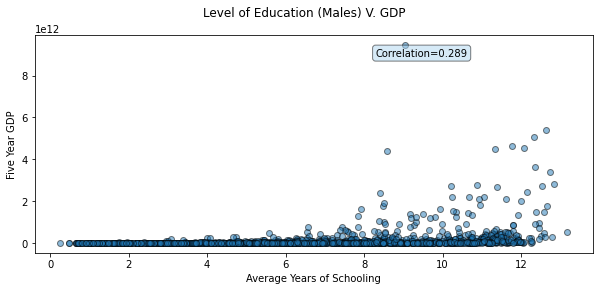

In [46]:
avg_total_GDP_m = blm_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Schooling']

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,4))

fig.suptitle("Level of Education (Males) V. GDP")
#Dictionary to be used for the textbox format
props = dict(boxstyle='round', facecolor='#AED6F1', alpha=0.5)

ax.scatter(x=blm_GDP["Avg. Years of Schooling"], y=blm_GDP["Five Year GDP"], edgecolor='black', alpha=0.5)
ax.set_xlabel("Average Years of Schooling")
ax.set_ylabel("Five Year GDP")

#Setting the textbox up
bottom, top = ax.get_ylim()
left, right = ax.get_xlim()
ax.text(right-right*0.40, top-top*0.10, f"Correlation={avg_total_GDP_m:.3f}", bbox=props)

There's none. Let us move on to more specific analysis.

Text(1.14975, 8930248736765.016, 'Correlation=0.357')

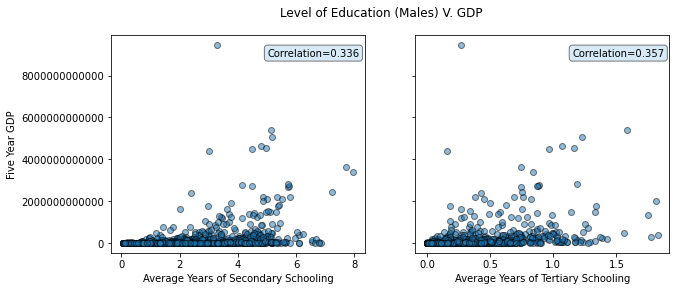

In [47]:
avg_sec_GDP_m = blm_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Secondary Schooling']
avg_ter_GDP_m = blm_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Tertiary Schooling']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

fig.suptitle("Level of Education (Males) V. GDP")
#Dictionary to be used for the textbox format
props = dict(boxstyle='round', facecolor='#AED6F1', alpha=0.5)

ax1.scatter(x=blm_GDP["Avg. Years of Secondary Schooling"], y=blm_GDP["Five Year GDP"], edgecolor='black', alpha=0.5)
ax1.set_xlabel("Average Years of Secondary Schooling")
ax1.set_ylabel("Five Year GDP")

#Setting the textbox up
bottom1, top1 = ax1.get_ylim()
left1, right1 = ax1.get_xlim()
ax1.text(right1-right1*0.40, top1-top1*0.10, "Correlation=0.336", bbox=props)

#To stop y label from showing in scientific notation
ax1.ticklabel_format(style='plain')

ax2.scatter(x=blm_GDP["Avg. Years of Tertiary Schooling"], y=blm_GDP["Five Year GDP"], edgecolor='black', alpha=0.5)
ax2.set_xlabel("Average Years of Tertiary Schooling")

#Setting the textbox up
bottom2, top2 = ax2.get_ylim()
left2, right2 = ax2.get_xlim()
ax2.text(right2-right2*0.40, top2-top2*0.10, "Correlation=0.357", bbox=props)

The above scatter plots and the accompanying correlational values denotes that it wouldn't be wise to ascertain any type of relation between increasing levels of secondary or tertiary education for males and an increase in the GDP of that country.

In the following cells, we would perform the same analysys for females.

In [48]:
#Combining the GDP dataframe we prepared above and the Barro Lee Males dataset:
barro_lee_f['Year'] = barro_lee_f['Year'].astype('int')
blf_GDP = barro_lee_f.merge(GDP_new, on=['Country', 'Year'])

Text(1.17747, 8930248736765.016, 'Correlation=0.312')

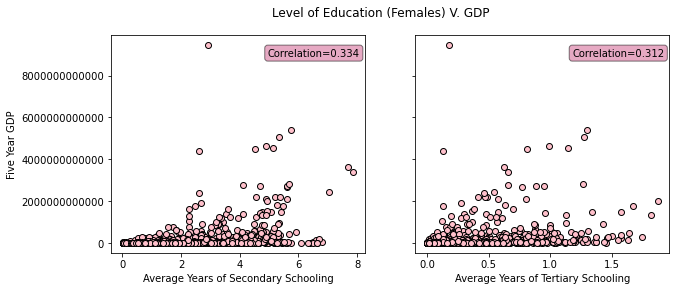

In [49]:
avg_sec_GDP_f = blf_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Secondary Schooling']
avg_ter_GDP_f = blf_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Tertiary Schooling']
#Correlational values
# print(avg_sec_GDP_f)
# print(avg_ter_GDP_f)

fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

fig.suptitle("Level of Education (Females) V. GDP")
#Dictionary to be used for the textbox format
props = dict(boxstyle='round', facecolor='#CE5488', alpha=0.5)

ax3.scatter(x=blf_GDP["Avg. Years of Secondary Schooling"], y=blf_GDP["Five Year GDP"], c='pink', edgecolor='black')
ax3.set_xlabel("Average Years of Secondary Schooling")
ax3.set_ylabel("Five Year GDP")

#Setting the textbox up
bottom3, top3 = ax3.get_ylim()
left3, right3 = ax3.get_xlim()
ax3.text(right3-right3*0.40, top3-top3*0.10, "Correlation=0.334", bbox=props)

#To stop y label from showing in scientific notation
ax3.ticklabel_format(style='plain')

ax4.scatter(x=blf_GDP["Avg. Years of Tertiary Schooling"], y=blf_GDP["Five Year GDP"], c='pink', edgecolor='black')
ax4.set_xlabel("Average Years of Tertiary Schooling")

#Setting the textbox up
bottom4, top4 = ax4.get_ylim()
left4, right4 = ax4.get_xlim()
ax4.text(right4-right4*0.40, top4-top4*0.10, "Correlation=0.312", bbox=props)


In [50]:
#Combining the GDP dataframe we prepared above and the Barro Lee Males dataset:
barro_lee['Year'] = barro_lee['Year'].astype('int')
bl_GDP = barro_lee.merge(GDP_new, on=['Country', 'Year'])

0.3376171816020141
0.33921179119379125


Text(1.1629800000000001, 8930248736765.016, 'Correlation=0.339')

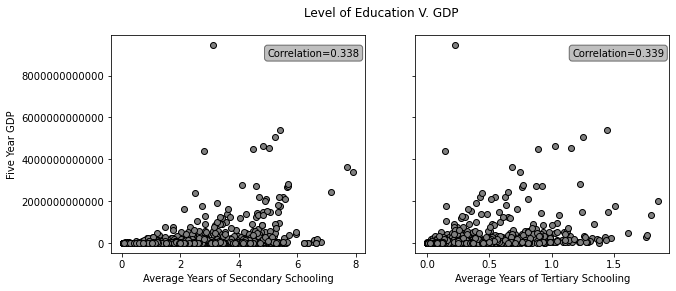

In [51]:
avg_sec_GDP = bl_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Secondary Schooling']
avg_ter_GDP = bl_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Tertiary Schooling']
#Correlational values
print(avg_sec_GDP)
print(avg_ter_GDP)

fig, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

fig.suptitle("Level of Education V. GDP")
#Dictionary to be used for the textbox format
props = dict(boxstyle='round', facecolor='grey', alpha=0.5)

ax5.scatter(x=bl_GDP["Avg. Years of Secondary Schooling"], y=bl_GDP["Five Year GDP"], c='grey', edgecolor='black')
ax5.set_xlabel("Average Years of Secondary Schooling")
ax5.set_ylabel("Five Year GDP")

#Setting the textbox up
bottom5, top5 = ax5.get_ylim()
left5, right5 = ax5.get_xlim()
ax5.text(right5-right5*0.40, top5-top5*0.10, "Correlation=0.338", bbox=props)

#To stop y label from showing in scientific notation
ax5.ticklabel_format(style='plain')

ax6.scatter(x=bl_GDP["Avg. Years of Tertiary Schooling"], y=bl_GDP["Five Year GDP"], c='grey', edgecolor='black')
ax6.set_xlabel("Average Years of Tertiary Schooling")

#Setting the textbox up
bottom6, top6 = ax6.get_ylim()
left6, right6 = ax6.get_xlim()
ax6.text(right6-right6*0.40, top6-top6*0.10, "Correlation=0.339", bbox=props)



### Coefficient of Determination.

To be sure, I am also going to calculate the Coefficient of Determination for the column of Average Years of Secondary and Tertiary education against the GDP column, and see if we are right in our analysis so far to assume that educational levels and GDP, generally speaking, are not holding up.

In [52]:
bl_GDP['Avg. Years of Secondary & Tertiary Schooling'] = bl_GDP['Avg. Years of Secondary Schooling'] + bl_GDP['Avg. Years of Tertiary Schooling']

Text(5.45487, 8930248736765.016, 'Correlation=0.348')

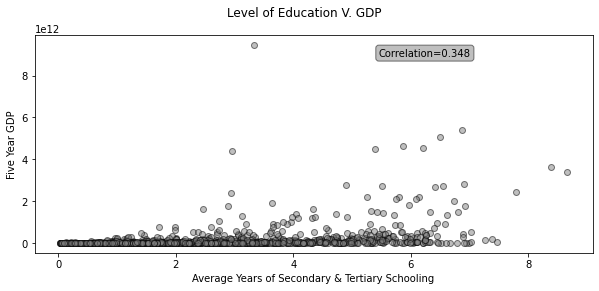

In [53]:
avg_sec_ter_GDP = bl_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Secondary & Tertiary Schooling']

fig, ax7 = plt.subplots(nrows=1, sharey=True, figsize=(10,4))

fig.suptitle("Level of Education V. GDP")
#Dictionary to be used for the textbox format
props = dict(boxstyle='round', facecolor='grey', alpha=0.5)

ax7.scatter(x=bl_GDP["Avg. Years of Secondary & Tertiary Schooling"], y=bl_GDP["Five Year GDP"], c='grey', edgecolor='black', alpha=0.5)
ax7.set_xlabel("Average Years of Secondary & Tertiary Schooling")
ax7.set_ylabel("Five Year GDP")

#Setting the textbox up
bottom7, top7 = ax7.get_ylim()
left7, right7 = ax7.get_xlim()
ax7.text(right7-right7*0.40, top7-top7*0.10, f"Correlation={avg_sec_ter_GDP:.3f}", bbox=props)

In [54]:
r_squared_STGDP = avg_sec_ter_GDP**2
r_squared_STGDP

0.12121761296332309

Now that is it established that on a generic level, there is no correlation between the GDP of a country and the level of education of the general populace. Rather than giving up on mining for any semblance of relation between the variables, I would like to account for a few lurking variables and try again. One of such variable might be a lack of infrastructure and the resulting out-migration of the more education people to the frontiers of technology. 

### Lack of infrastructure and the resulting out-migration as a lurking variable.

It is very feasible that countries that are producing a populace with tertiary education doesn't have a significant base of infrastructure that can retain that populace by providing them jobs for their specialties. That can lead to a significant migration out of the country, and therefore would lead to an increased GDP for that country. One possible way to control for this effect is to gather correlations based on the economy types ("Advanced Economies", "East Asia And the Pacific", etc.). This is something we will try to do in the following cells.

In [55]:
bl_GDP['Region'].unique()

array(['Advanced Economies', 'East Asia and the Pacific',
       'Europe and Central Asia', 'Latin America and the Caribbean',
       'Middle East and North Africa', 'South Asia', 'Sub-Saharan Africa'],
      dtype=object)

We will first calculate the correlation between any country belonging to the 'Advanced Economies' region and the GDP for those countries. Reason being, if out-migration was affecting the correlatiokn between education and GDP, then it is most probably the advanced economies that that labor force is translating over to, hence also being accounted for in the overall education level for the populace for those countries.  

Text(5.44281, 5112438820465.636, 'Correlation=0.507')

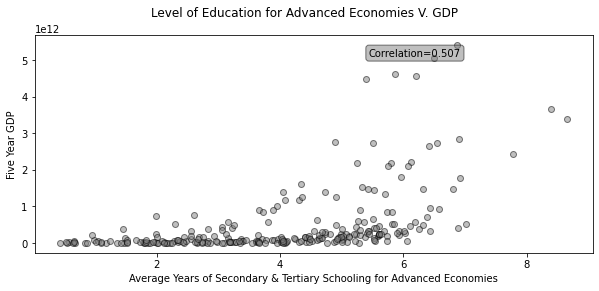

In [56]:
adv_econ_bl_GDP = bl_GDP[bl_GDP['Region']=='Advanced Economies']
adv_econ_corr = adv_econ_bl_GDP.corr(numeric_only=True).loc['Five Year GDP', 'Avg. Years of Secondary & Tertiary Schooling']

fig, ax8 = plt.subplots(nrows=1, sharey=True, figsize=(10,4))

fig.suptitle("Level of Education for Advanced Economies V. GDP")
#Dictionary to be used for the textbox format
props = dict(boxstyle='round', facecolor='grey', alpha=0.5)

ax8.scatter(x=adv_econ_bl_GDP["Avg. Years of Secondary & Tertiary Schooling"], y=adv_econ_bl_GDP["Five Year GDP"], c='grey', edgecolor='black', alpha=0.5)
ax8.set_xlabel("Average Years of Secondary & Tertiary Schooling for Advanced Economies")
ax8.set_ylabel("Five Year GDP")

#Setting the textbox up
bottom8, top8 = ax8.get_ylim()
left8, right8 = ax8.get_xlim()
ax8.text(right8-right8*0.40, top8-top8*0.10, f"Correlation={adv_econ_corr:.3f}", bbox=props)

Alright! We are finally making some headway! Let us dissect this correlation a bit further by seeing if there exists seperate but just as strong (or even stronger) correlations between specific levels of educations and GDP levels. 

In [68]:
def plot_scat(df, edu_level, region, color):
    df_corr = df.corr(numeric_only=True).loc['Five Year GDP', edu_level]

    fig, ax = plt.subplots(nrows=1, sharey=True, figsize=(10,4))

    fig.suptitle(f"Level of Education for {region} V. GDP")
    #Dictionary to be used for the textbox format
    props = dict(boxstyle='round', facecolor=color, alpha=0.5)

    ax.scatter(x=adv_econ_bl_GDP[edu_level], y=adv_econ_bl_GDP["Five Year GDP"], c=color, edgecolor='black', alpha=0.5)
    ax.set_xlabel(f"{edu_level} for {region}")
    ax.set_ylabel("Five Year GDP {in Tera dollars}")

    #Setting the textbox up
    bottom, top = ax.get_ylim()
    left, right = ax.get_xlim()
    ax.text(right-right*0.40, top-top*0.10, f"Correlation={df_corr:.3f}", bbox=props)

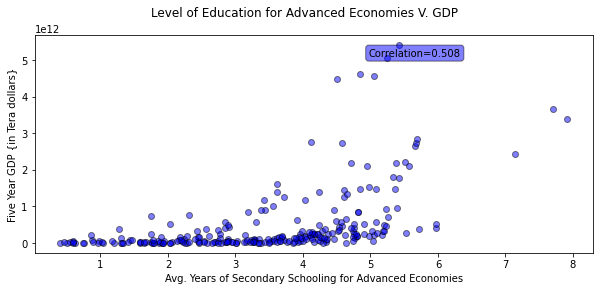

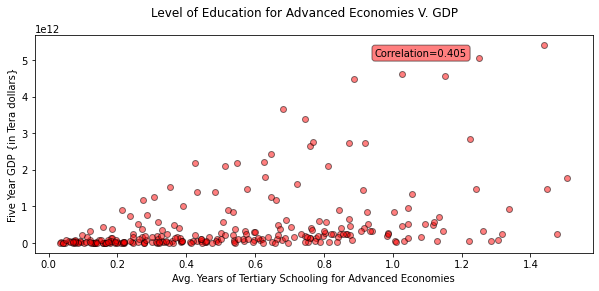

In [70]:
plot_scat(adv_econ_bl_GDP, 'Avg. Years of Secondary Schooling', 'Advanced Economies', 'blue')
plot_scat(adv_econ_bl_GDP, 'Avg. Years of Tertiary Schooling', 'Advanced Economies', 'red')

The correlation between the level of tertiary education and the GDPs of the country is no better than the correlation between the level of overall education and their GDPs. Could it be assumed then that the lack of correlation between other countries' education levels and their GDPs could be because of the lurking variable of out-migration? What other variables could be lurking who could be accounted for?

### References: 

- Aghion, P., Vandenbussche, J., Hoxby, C., & Boustan, L. (2009, March). The Causal Impact of
Education on Economic Growth: Evidence from U.S. Retrieved December 11, 2021, from
https://scholar.harvard.edu/files/aghion/files/causal_impact_of_education.pdf
- Valero, A., & Van Reenen, J. (2019). The economic impact of universities: Evidence from across
the Globe. Economics of Education Review, 68, 53-67.
doi:10.1016/j.econedurev.2018.09.001